# Module 2 - Multi Qubit System 

# Module 2 — Multi-Qubit Systems

## 2.1 Tensor Product & Multi-Qubit State Construction
- A 2-qubit system is built from the tensor product of two single qubits.  
- Example: |0> ⊗ |0> = |00>.  
- With 2 qubits, the statevector has 4 amplitudes: [|00>, |01>, |10>, |11>].

## 2.2 The CNOT Gate
- Controlled-NOT flips the target qubit if the control qubit = 1.  
- Essential for creating entanglement.

## 2.3 The Controlled-Z Gate
- Adds a phase flip (Z) only when control = 1.  
- Often used in entanglement and phase-based circuits.

## 2.4 The SWAP Gate
- Exchanges the states of two qubits.  
- Useful for reordering qubits in circuits.

## 2.5 Building Simple Two-Qubit Circuits
- Combine gates to explore multi-qubit interactions.  
- Example: H + CNOT → Bell state.

## 2.6 Hands-On: Bell State Preparation & Measurement
- Create (|00> + |11>)/√2 using H + CNOT.  
- Measure in computational basis to see correlation.  


In [2]:
# tensor product example
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2)
state = Statevector.from_instruction(qc)
display(state.draw('latex'))


<IPython.core.display.Latex object>

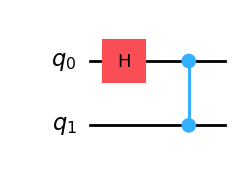

In [3]:
# CZ Gate
qc = QuantumCircuit(2)
qc.h(0)
qc.cz(0,1)
qc.draw('mpl')


In [64]:
# Swap Gate
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
display(qc.draw())
state = Statevector.from_instruction(qc)
display(state.draw('latex'))


┌───┐   
q_0: ┤ X ├─X─
     └───┘ │ 
q_1: ──────X─

<IPython.core.display.Latex object>

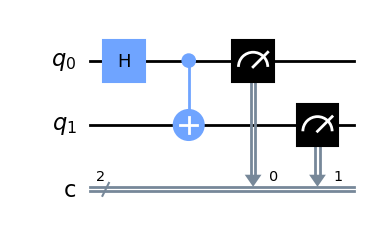

In [8]:
# Step 1 Create a 2-Qubit circuit
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1) # CNot : contro-qubit 0, target- qubit 1
qc.measure([0,1],[0,1])
#qc.draw('mpl')

{'00': 1017, '11': 983}


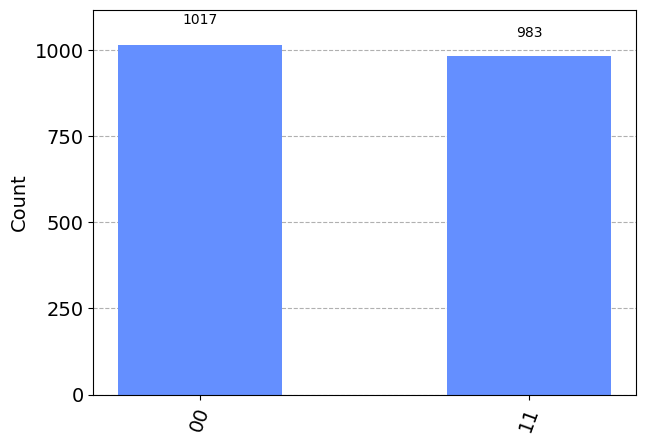

In [13]:
# Step 2 Simulate the circuit
from qiskit_aer import AerSimulator
from qiskit import transpile 
from qiskit.visualization import plot_histogram

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 2000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [29]:
# Look at the statevector
%matplotlib inline
from qiskit.quantum_info import Statevector
from IPython.display import display

qc_no_measure = QuantumCircuit(2)
qc_no_measure.h(0)
qc_no_measure.cx(0, 1)

psi = Statevector.from_instruction(qc_no_measure)
display(psi.draw('latex'))

<IPython.core.display.Latex object>

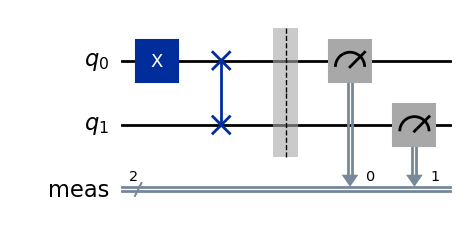

In [5]:
# Swap Gate
qc = QuantumCircuit(2)
qc.x(0)       # set first qubit to |1>
qc.swap(0, 1)
qc.measure_all()
qc.draw('mpl')


{'111': 992, '000': 1008}


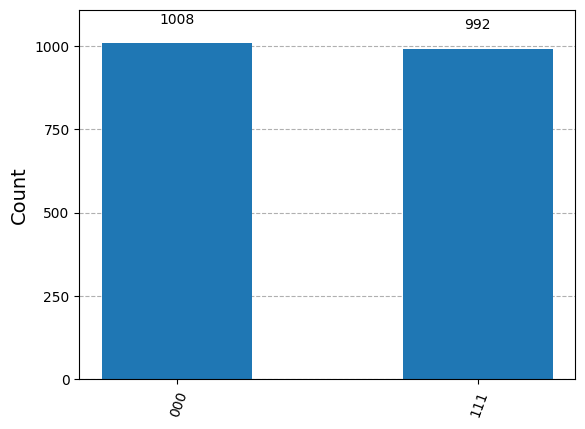

In [13]:
# Mini Excercise
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure([0,1,2], [0,1,2])
qc.draw('mpl')
sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 2000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [70]:
# Bell State
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#qc.measure([0,1],[0,1])
display(Statevector.from_instruction(qc).draw('latex'))
display(qc.draw())

<IPython.core.display.Latex object>

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════